In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


here in this data we have data for some power plant in india, and in that we have data for each powerplant basic information like its source , capacity , geneartion , owenr and etc. 

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
df1=df.drop(['other_fuel3','wepp_id','generation_gwh_2019'],axis=1)

Here we drop the some column as it has most of data are nan values so we drop this column to look our data more simple and easy to understand

In [6]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
byComp =df.groupby('primary_fuel')
print('\nCountry wise generation\n')
print(byComp.count())


Country wise generation

              country  country_long  name  gppd_idnr  capacity_mw  latitude  \
primary_fuel                                                                  
Biomass            50            50    50         50           50        50   
Coal              258           258   258        258          258       253   
Gas                69            69    69         69           69        68   
Hydro             251           251   251        251          251       233   
Nuclear             9             9     9          9            9         9   
Oil                20            20    20         20           20        17   
Solar             127           127   127        127          127       123   
Wind              123           123   123        123          123       108   

              longitude  other_fuel1  other_fuel2  other_fuel3  ...  \
primary_fuel                                                    ...   
Biomass              50            0     

here in above output it shows lots of information in it shows us total count of raw as per separated by data in column primary fuel.

In [10]:
df1['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [11]:
df2=df1.drop(['other_fuel2','country','country_long','generation_gwh_2013'],axis=1)

we also drop column other_fuel2 and generation_gwh_2013 it has also just also small data in whole column other than most has nan value.
and we also drop column country and country_long as we don't need this data for prediction.

In [12]:
df2

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

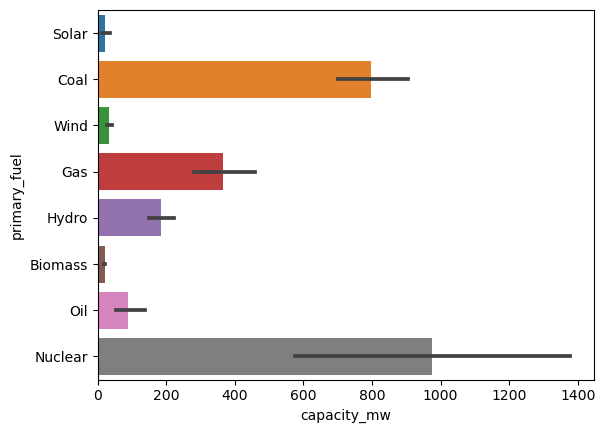

In [14]:
sns.barplot(df2['capacity_mw'],df['primary_fuel'])


Here from above chart we can see highest power capacity power source is nucler and after that second highest is coal , this both has covers almost more than 50% of total capacity in power source.

<AxesSubplot:xlabel='capacity_mw', ylabel='geolocation_source'>

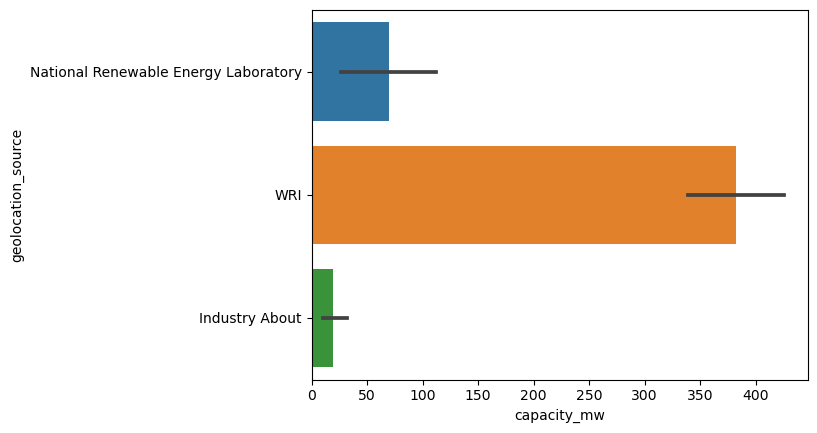

In [15]:
sns.barplot(df['capacity_mw'],df['geolocation_source'])

as per above chart we can clearly say most of power capacity geolocation soucre is WRI.

In [16]:
df2['year_of_capacity_data'] = df2['year_of_capacity_data'].fillna(0)  
df2['year_of_capacity_data'] = df2['year_of_capacity_data'].astype(int)
df2['commissioning_year'] = df2['commissioning_year'].fillna(0)  
df2['commissioning_year'] = df2['commissioning_year'].astype(str)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

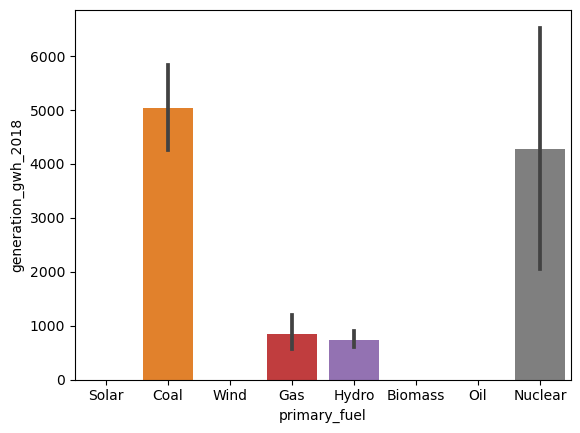

In [145]:
sns.barplot(df1['primary_fuel'],df1['generation_gwh_2018'])

as per data in latest 2018 most of power is generated by Nuclear and coal power plant.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_data_source'>

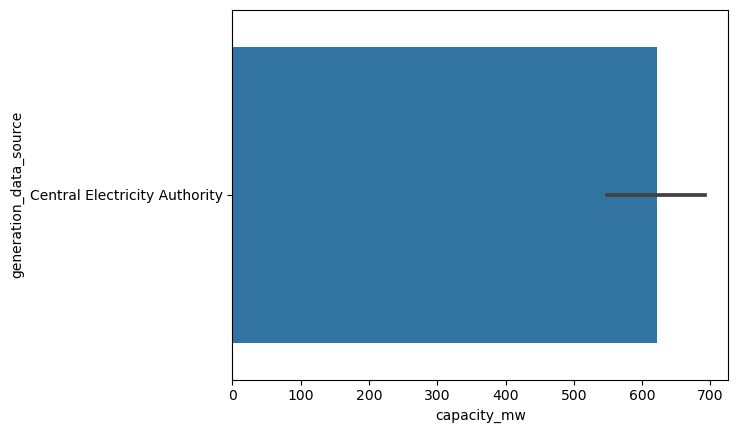

In [18]:
sns.barplot(x='capacity_mw', y='generation_data_source', data=df2, orient='h')

<AxesSubplot:>

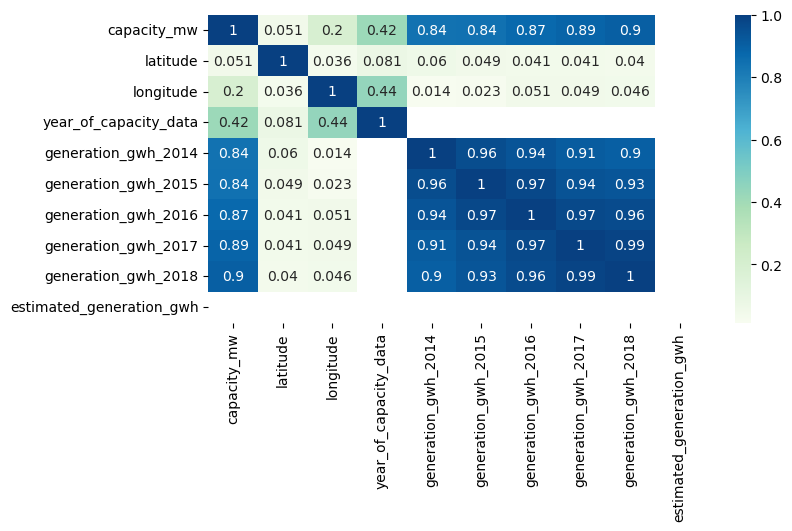

In [19]:
plt.figure(figsize=(8,4))
sns.heatmap(df2.corr(),cmap='GnBu',annot=True)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

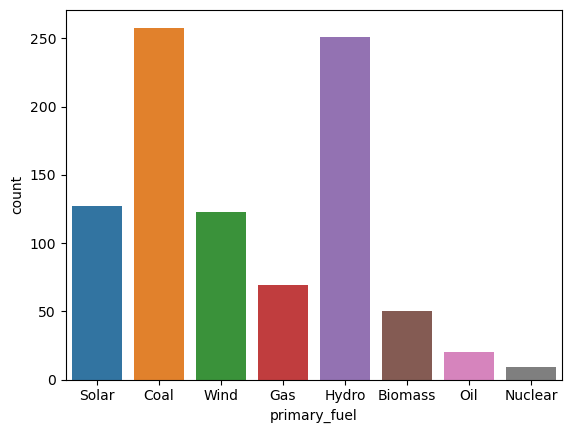

In [20]:
sns.countplot(df2['primary_fuel'])

here we can see count of each power source plant in india, we have around 250 plant for coal and hydro each which is highest compare to other source.

In [21]:
df2

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,0.0,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df3=df2

In [23]:
df3.fillna(value=0,inplace=True)
df3

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,0,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,0,2004.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,0.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,0.0
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0,0.0,0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0


# Making a Model for Prediction

In [24]:
x = df3.iloc[:,2:3].join(df3.iloc[:, 7:8]).join(df3.iloc[:, 12:-2])

In [25]:
df3['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [26]:
y=df3.iloc[:,5:6]

In [27]:
y.head()

,primary_fuel
0,Solar
1,Coal
2,Wind
3,Gas
4,Coal


In [28]:
x.head()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,2011.0,0,0.000000,0.000,0.000000,0.000000,0.000000
1,98.0,0.0,0,0.000000,0.000,0.000000,0.000000,0.000000
2,39.2,0.0,0,0.000000,0.000,0.000000,0.000000,0.000000
3,135.0,2004.0,2019,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,2015.0,2019,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      907 non-null    object 
 1   gppd_idnr                 907 non-null    object 
 2   capacity_mw               907 non-null    float64
 3   latitude                  907 non-null    float64
 4   longitude                 907 non-null    float64
 5   primary_fuel              907 non-null    int32  
 6   other_fuel1               907 non-null    object 
 7   commissioning_year        907 non-null    object 
 8   owner                     907 non-null    object 
 9   source                    907 non-null    object 
 10  url                       907 non-null    object 
 11  geolocation_source        907 non-null    object 
 12  year_of_capacity_data     907 non-null    int32  
 13  generation_gwh_2014       907 non-null    float64
 14  generation

In [60]:
df3['commissioning_year'].unique()

array(['2011.0', '0.0', '2004.0', '2015.0', '2005.0', '1970.0', '2010.0',
       '2008.0', '2014.0', '1985.0', '1986.0', '1987.0', '2000.0',
       '1989.0', '2017.0', '1977.0', '1980.0', '2003.0', '1984.0',
       '1976.0', '1996.0', '1991.0', '2002.0', '2001.0', '2006.0',
       '2007.0', '1988.0', '1973.0', '2012.0', '1968.0', '1964.0',
       '2016.0', '2013.0', '1962.0', '1998.0', '1993.0', '1997.0',
       '1999.0', '1994.0', '1975.0', '1992.0', '1972.0', '1979.0',
       '1967.0', '1995.0', '1983.0', '1981.0', '2018.0', '1959.0',
       '1961.0', '1957.0', '1978.0', '1963.0', '1971.0', '1955.0',
       '2009.0', '1966.0', '1965.0', '1960.0', '1949.0', '1952.0',
       '1990.0', '1982.0', '1937.0', '1956.0', '1946.0', '1958.0',
       '1943.0', '1954.0', '1969.0', '1939.0', '1927.0', '1974.0',
       '1953.0'], dtype=object)

In [29]:
df3['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3['primary_fuel'] = le.fit_transform(df['primary_fuel'])
y_train_encoded = le.fit_transform(y_train)

Convert Primary fuel data in to int data type for model prediction.

In [63]:
df3

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,0,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,0,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,0,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,0,2004.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,0.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,Oil,2015.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,Oil,2016.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,0.0
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,0,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,0,0.0,0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,0,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      907 non-null    object 
 1   gppd_idnr                 907 non-null    object 
 2   capacity_mw               907 non-null    float64
 3   latitude                  907 non-null    float64
 4   longitude                 907 non-null    float64
 5   primary_fuel              907 non-null    int32  
 6   other_fuel1               907 non-null    object 
 7   commissioning_year        907 non-null    object 
 8   owner                     907 non-null    object 
 9   source                    907 non-null    object 
 10  url                       907 non-null    object 
 11  geolocation_source        907 non-null    object 
 12  year_of_capacity_data     907 non-null    int32  
 13  generation_gwh_2014       907 non-null    float64
 14  generation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)


In [98]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred=lg.predict(x_test)
pred

array(['Hydro', 'Solar', 'Hydro', 'Hydro', 'Hydro', 'Solar', 'Hydro',
       'Solar', 'Coal', 'Solar', 'Solar', 'Solar', 'Solar', 'Solar',
       'Hydro', 'Solar', 'Solar', 'Hydro', 'Coal', 'Hydro', 'Solar',
       'Solar', 'Solar', 'Hydro', 'Solar', 'Solar', 'Coal', 'Solar',
       'Solar', 'Solar', 'Coal', 'Hydro', 'Coal', 'Coal', 'Hydro',
       'Hydro', 'Hydro', 'Gas', 'Hydro', 'Solar', 'Solar', 'Hydro',
       'Hydro', 'Hydro', 'Solar', 'Hydro', 'Hydro', 'Solar', 'Coal',
       'Solar', 'Solar', 'Hydro', 'Solar', 'Coal', 'Solar', 'Hydro',
       'Solar', 'Solar', 'Hydro', 'Hydro', 'Solar', 'Coal', 'Solar',
       'Hydro', 'Solar', 'Solar', 'Hydro', 'Solar', 'Solar', 'Hydro',
       'Hydro', 'Solar', 'Hydro', 'Hydro', 'Coal', 'Coal', 'Hydro',
       'Coal', 'Hydro', 'Hydro', 'Hydro', 'Solar', 'Solar', 'Hydro',
       'Hydro', 'Hydro', 'Hydro', 'Solar', 'Coal', 'Solar', 'Hydro',
       'Hydro', 'Solar', 'Solar', 'Hydro', 'Hydro', 'Solar', 'Hydro',
       'Hydro', 'Hydro', 'Gas', 'Hy

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
accuracy_score(y_test,pred)

0.5347985347985348

Logisctic regression model accuracy is 53% which is low , so we try other model and find model which has more accuracy. 

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.5677655677655677
[[ 5  1  0  0  0  0  2  1]
 [ 3 41  8  8  3  0  5  7]
 [ 1  7 10  6  0  0  0  0]
 [ 0  6  9 70  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  1  2  1  3  0  0]
 [ 6  3  0  0  0  0 14  4]
 [ 8  7  1  0  0  1 13 12]]
              precision    recall  f1-score   support

     Biomass       0.22      0.56      0.31         9
        Coal       0.59      0.55      0.57        75
         Gas       0.34      0.42      0.38        24
       Hydro       0.81      0.82      0.82        85
     Nuclear       0.00      0.00      0.00         3
         Oil       0.75      0.38      0.50         8
       Solar       0.41      0.52      0.46        27
        Wind       0.50      0.29      0.36        42

    accuracy                           0.57       273
   macro avg       0.45      0.44      0.43       273
weighted avg       0.59      0.57      0.57       273



Decision Tree classifier model accuracy is 56 %.

In [103]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [104]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.4358974358974359
[[ 0  0  0  0  0  0  0  9]
 [ 0 24 12  4 12  2  0 21]
 [ 0  1  7  7  2  2  0  5]
 [ 0  1 10 35  2 37  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  1]
 [ 0  0  0  0  0  0  4 23]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         9
        Coal       0.86      0.32      0.47        75
         Gas       0.23      0.29      0.26        24
       Hydro       0.76      0.41      0.53        85
     Nuclear       0.00      0.00      0.00         3
         Oil       0.15      0.88      0.25         8
       Solar       1.00      0.15      0.26        27
        Wind       0.42      1.00      0.59        42

    accuracy                           0.44       273
   macro avg       0.43      0.38      0.29       273
weighted avg       0.66      0.44      0.44       273



MultinomialNB model accuracy is 43 %.

In [105]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5347985347985348
[[ 0  0  0  0  0  0  9  0]
 [ 0 36  0 18  0  0 21  0]
 [ 0  3  0 16  0  0  5  0]
 [ 0  2  0 83  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  7  0  0  1  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0 42  0]]
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         9
        Coal       0.84      0.48      0.61        75
         Gas       0.00      0.00      0.00        24
       Hydro       0.66      0.98      0.79        85
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         8
       Solar       0.26      1.00      0.41        27
        Wind       0.00      0.00      0.00        42

    accuracy                           0.53       273
   macro avg       0.22      0.31      0.23       273
weighted avg       0.46      0.53      0.45       273



SVC model accuracy is 53 %.

In [106]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))

0.6190476190476191


knn model accuracy is 62 %.

In [107]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
from sklearn.linear_model import Lasso,Ridge

In [109]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print(score)

[0.32967033 0.41208791 0.37016575 0.35359116 0.37016575]


In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [111]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([2.13782752e-01, 1.36832529e-01, 8.17448346e-02, 3.58919348e-01,
       8.64607914e-02, 1.25452785e-01, 9.10632940e-02, 1.30599707e-01,
       5.58198445e-01, 1.27929937e-01, 1.33405662e-01, 1.41358861e-01,
       1.26436819e-01, 1.27796890e-01, 2.15444336e-01, 1.30793415e-01,
       1.30306574e-01, 1.81620300e-01, 6.03222138e-01, 6.74357991e-02,
       1.29103146e-01, 1.34629511e-01, 1.26436819e-01, 1.96635316e-01,
       1.36013692e-01, 1.32168374e-01, 8.64319027e-01, 1.26436819e-01,
       1.27796890e-01, 1.32610518e-01, 4.69812353e-01, 3.28331425e-01,
       5.60707282e-01, 6.31110392e-01, 1.87169116e-01, 1.77543849e-01,
       1.08945361e-01, 3.28296511e-01, 8.93636091e-02, 1.39273866e-01,
       1.33793005e-01, 3.32556896e-01, 2.85335304e-01, 1.10269666e-01,
       1.30599707e-01, 3.08610474e-01, 2.47456447e-01, 1.31033625e-01,
       6.74776076e-01, 1.26436819e-01, 1.36832529e-01, 8.88882854e-02,
       1.41219973e-01, 9.22765923e-01, 1.32088161e-01, 9.78710595e-02,
      

In [112]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))

0.23809523809523808


In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred_powerSource=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred_powerSource))

0.6410256410256411


Gradient Boosting Classifier has highest accuracy which is 64 % so we consider this model.

In [151]:

print('Predicted power source:',gb_pred_powerSource)
print('actual power source',y_test)

Predicted power source: ['Hydro' 'Wind' 'Hydro' 'Hydro' 'Hydro' 'Wind' 'Hydro' 'Solar' 'Coal'
 'Wind' 'Wind' 'Coal' 'Solar' 'Solar' 'Hydro' 'Oil' 'Biomass' 'Hydro'
 'Coal' 'Hydro' 'Solar' 'Coal' 'Solar' 'Gas' 'Coal' 'Biomass' 'Coal'
 'Solar' 'Solar' 'Coal' 'Hydro' 'Coal' 'Gas' 'Coal' 'Coal' 'Hydro' 'Hydro'
 'Gas' 'Hydro' 'Coal' 'Coal' 'Hydro' 'Hydro' 'Hydro' 'Solar' 'Coal' 'Coal'
 'Wind' 'Hydro' 'Solar' 'Wind' 'Hydro' 'Oil' 'Coal' 'Biomass' 'Oil'
 'Solar' 'Coal' 'Hydro' 'Hydro' 'Biomass' 'Coal' 'Coal' 'Coal' 'Solar'
 'Biomass' 'Hydro' 'Solar' 'Wind' 'Hydro' 'Hydro' 'Solar' 'Hydro' 'Hydro'
 'Coal' 'Coal' 'Coal' 'Coal' 'Hydro' 'Hydro' 'Gas' 'Solar' 'Coal' 'Hydro'
 'Hydro' 'Coal' 'Hydro' 'Coal' 'Coal' 'Coal' 'Hydro' 'Hydro' 'Biomass'
 'Solar' 'Hydro' 'Hydro' 'Wind' 'Hydro' 'Hydro' 'Hydro' 'Coal' 'Hydro'
 'Coal' 'Coal' 'Hydro' 'Biomass' 'Coal' 'Hydro' 'Hydro' 'Coal' 'Solar'
 'Hydro' 'Hydro' 'Coal' 'Solar' 'Coal' 'Coal' 'Hydro' 'Hydro' 'Coal'
 'Wind' 'Coal' 'Solar' 'Biomass' 'Biomass' 'Hydr

here above we can see actual power source and predicted power source by best model GradientBoostingClassifier which has 64% accuracy.

In [114]:
from sklearn.ensemble import VotingClassifier

In [115]:
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

In [87]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [88]:
vot_hard=VotingClassifier(estimators=estimator,voting = 'hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)

print(y_pred)
score= accuracy_score(y_test,y_pred)
print("Voting Score %d"% score)

['Hydro' 'Wind' 'Hydro' 'Hydro' 'Hydro' 'Wind' 'Hydro' 'Biomass' 'Coal'
 'Wind' 'Wind' 'Coal' 'Solar' 'Biomass' 'Hydro' 'Biomass' 'Biomass'
 'Hydro' 'Coal' 'Hydro' 'Solar' 'Wind' 'Solar' 'Coal' 'Coal' 'Biomass'
 'Coal' 'Solar' 'Biomass' 'Coal' 'Coal' 'Coal' 'Coal' 'Coal' 'Hydro'
 'Hydro' 'Hydro' 'Gas' 'Hydro' 'Coal' 'Wind' 'Hydro' 'Hydro' 'Coal'
 'Biomass' 'Coal' 'Coal' 'Wind' 'Coal' 'Solar' 'Wind' 'Hydro' 'Coal'
 'Coal' 'Biomass' 'Hydro' 'Solar' 'Coal' 'Hydro' 'Hydro' 'Biomass' 'Coal'
 'Coal' 'Coal' 'Solar' 'Biomass' 'Hydro' 'Solar' 'Wind' 'Hydro' 'Hydro'
 'Solar' 'Hydro' 'Hydro' 'Coal' 'Coal' 'Gas' 'Coal' 'Hydro' 'Coal' 'Coal'
 'Solar' 'Coal' 'Hydro' 'Hydro' 'Hydro' 'Hydro' 'Solar' 'Coal' 'Coal'
 'Hydro' 'Hydro' 'Biomass' 'Solar' 'Hydro' 'Hydro' 'Wind' 'Hydro' 'Coal'
 'Hydro' 'Gas' 'Hydro' 'Coal' 'Coal' 'Hydro' 'Biomass' 'Coal' 'Hydro'
 'Gas' 'Coal' 'Solar' 'Hydro' 'Coal' 'Coal' 'Solar' 'Coal' 'Coal' 'Hydro'
 'Hydro' 'Coal' 'Wind' 'Biomass' 'Biomass' 'Biomass' 'Biomass' 'Hydro'
 'Coa

In [90]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [116]:
import joblib
joblib.dump(gb_pred_powerSource, 'global_power_source_prediction.pkl')

['global_power_source_prediction.pkl']

# Now we predict the capacity in MW

In [118]:
df3

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,0,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,0,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,0,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,0,2004.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,0.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,Oil,2015.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,Oil,2016.0,0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,0.0
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,0,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,0,0.0,0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,0,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0


In [129]:
x1 = df3.iloc[:, 7:8].join(df3.iloc[:, 12:-2])

In [125]:
y1=df3.iloc[:,2:3]

In [130]:
x1.head()

,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2011.0,0,0.000000,0.000,0.000000,0.000000,0.000000
1,0.0,0,0.000000,0.000,0.000000,0.000000,0.000000
2,0.0,0,0.000000,0.000,0.000000,0.000000,0.000000
3,2004.0,2019,617.789264,843.747,886.004428,663.774500,626.239128
4,2015.0,2019,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [126]:
y1.head()

,capacity_mw
0,2.5
1,98.0
2,39.2
3,135.0
4,1800.0


In [135]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [132]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=42)


In [136]:
lm = LinearRegression()
lm.fit(x1_train, y1_train)

LinearRegression()

In [137]:
lm.score(x1_train,y1_train)

0.8353706458125815

here in Linear regression our model has 83 % accuracy so we consider this model.

In [140]:
predcapMW=lm.predict(x1_test)
print('Predicted capacity in MW:',predcapMW)
print('actual capacity in MW',y1_test)

Predicted capacity in MW: [[ 371.73668723]
 [  41.94739889]
 [ 223.56116077]
 [ 278.90121461]
 [ 187.29813419]
 [  41.94739889]
 [ 243.96170995]
 [  41.94739889]
 [ 311.48756286]
 [  41.94739889]
 [  41.94739889]
 [  41.94739889]
 [  41.94739889]
 [  41.94739889]
 [ 253.70252023]
 [  41.94739889]
 [  41.94739889]
 [ 215.15474037]
 [ 926.16930237]
 [ 186.24697731]
 [  41.94739889]
 [  41.94739889]
 [  41.94739889]
 [ 290.50388695]
 [  41.94739889]
 [  41.94739889]
 [1157.25476914]
 [  41.94739889]
 [  41.94739889]
 [  41.94739889]
 [ 370.72014284]
 [ 282.33510885]
 [ 462.21899077]
 [ 598.58389449]
 [ 270.02982476]
 [ 281.51841846]
 [ 258.10982218]
 [ 178.82724402]
 [ 187.29813419]
 [  41.94739889]
 [  41.94739889]
 [ 374.75944421]
 [ 374.54044869]
 [ 193.03544562]
 [  41.94739889]
 [ 557.07906618]
 [ 292.20352794]
 [  41.94739889]
 [ 408.45188078]
 [  41.94739889]
 [  41.94739889]
 [ 187.3582003 ]
 [  41.94739889]
 [ 875.13831507]
 [  41.94739889]
 [ 187.56843167]
 [  41.94739889]
 [  4

here above we can see actual capacity in MW and predicted capacity in MW by our model.

In [141]:

joblib.dump(predcapMW, 'global_power_capacity_prediction.pkl')

['global_power_capacity_prediction.pkl']

at the end we save our model for future predictions